In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import os
import random as alea
from scipy.linalg import solve,pinv,pinv2
from scipy.spatial.distance import pdist, squareform
import pandas as pd
from sklearn.decomposition import PCA
import time

In [2]:
# Librairie nSimplices courante
exec(compile(open(r"nSimplices_final.py", encoding="utf8").read(), "nSimplices_new.py", 'exec'))
#execfile("/path-to-code/2021-04-01_nSimplices-lib.py")

# set matplotlib default savefig directory
#os.chdir("/data/user/my-directory/")
plt.rcParams["savefig.directory"] = os.getcwd() # To save figures to directory
                                                #   defined above
### test data


data = pd.read_csv(r'datasets/bdd_synthetic_rdim10.csv',sep=';',header=None)
data.head()
#df.sample(frac = 0.1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,4.010045,7.605912,5.121693,2.012711,13.239657,0.544258,4.096576,7.954744,4.840211,-9.149928,1.989400,2.028782,1.998806,1.999819,2.007038,2.029254,1.989161,2.002128,2.009236,2.029597
1,3.001528,3.607599,-6.757307,5.864029,7.388758,7.200273,-3.970759,5.236329,3.019190,-5.869239,1.996643,2.011125,2.027733,1.974514,1.990747,2.012272,2.008546,2.008311,2.002387,2.003567
2,-0.458328,9.451292,6.094432,-2.259350,-2.666927,1.704595,2.805850,10.609370,1.933497,-5.056886,1.990291,1.988618,2.008213,2.008398,2.006818,1.995737,2.002557,1.989351,1.999557,2.001529
3,-3.071324,10.870284,16.069455,2.340153,3.915481,1.976716,0.772471,6.189006,6.882867,-6.115188,2.014134,2.002410,2.014142,1.994027,1.994113,2.013366,1.982573,2.009980,1.992397,2.007118
4,3.426358,9.121840,0.227281,2.735234,12.896083,7.165633,2.822065,21.318930,2.356204,-4.032068,1.987163,2.007985,1.970851,2.014760,1.992562,2.028419,2.009842,1.987356,2.018408,1.990408


In [3]:
### Traitement du fichier


X=data
X.head()

tab=data

D=pdist(tab.copy())
D_TRUE=squareform(D)

In [4]:
###Add outliers

proportion=0.05
N=tab.shape[0]
k=int(np.ceil(proportion*N))
# Tirage aléatoire de quelques points hors plan
indices=np.sort(alea.sample(range(N),k))
for n in indices:
    horsplan=alea.uniform(-50,50)

    #2 dimensions pertinentes dans 7 dimensions totales
    i=alea.randint(10,15)
    tab.loc[n,i] = horsplan
    print(str(n)+" "+str(i)+" devient "+ str(horsplan))


35 10 devient 28.446589378236837
37 10 devient 6.475185878888055
59 10 devient -20.926607092965344
82 14 devient -26.839928742657694
83 10 devient 20.938745811326726
101 15 devient -16.57156429491424
116 12 devient 34.520365598802016
130 10 devient -48.58188035919579
152 12 devient 33.32103190795077
163 14 devient -13.757150247337691


In [5]:

###Distances

""" euclidean distances """
N=tab.shape[0]
D=pdist(tab)
DSO=squareform(D)
# """ A few outliers along new axis """
# seed= 112 ; alea.seed(seed)
# sD=squareform(D)
# N=np.shape(sD)[0]
# pc=0.05 #proportion of outliers
# k=int(np.ceil(pc*N))
# sort(alea.sample(range(N),k))
# DSO=1.*sD# Tirage aléatoire de quelques points hors plan
# indices=np.
# for n in indices:
#     horsplan=50*alea.random()
#     print ("n,horsplan:"+str(n)+","+str(horsplan))
#     for m in [x for x in range(N) if x !=n]:
#         DSO[n,m]=DSO[m,n]=np.sqrt(DSO[n,m]**2+horsplan**2)

""" n = 3 , DSO """
# n=3
# Vn=[]
# seed=245124512 ; alea.seed(seed)
# for i in range(1000):
#     indices2=alea.sample(range(N),n+1)
#     Vn.append(nSimplexVolume(indices2,DSO))

#plt.hist(Vn) ; plt.show() # majorité nuls ou presque, un très petit nb ressort
#                          #   (comme ci-dessus, surement dû au bruit).


# ###nSimplices method
# """ Parameters and formatting of input data """
# cutoff=0.5*2*np.sqrt(2)
# trim=0.9
#
# # En entrée : DSO, qui contient quelques outliers hors-plan
# lDSO=squareform(DSO) # shape DSO as other matrices, i.e. as a N*(N-1)/2-sized flat matrix.
# data=squareform(lDSO)    #squareform( DNd ) #squareform(DNne)
# #(D+1.*np.array(Noise)) ou 1e-6,1e-5,... 1., 10. *Noise
# #D, Dd, DO, DOd, DSO, DNd. (Ddne)
#
#
# """ Applications of nSimplices :
#     - dimension detection
#     - outlier detection
#     - outliers are projected into relevant dimension
#     - result : distance matrix to be used in classical MDS, for instance.
# """
# print("\n Application of nSimplex \n ")
# t1=time.time()
# resu=nSimplwhichdim(data,cutoff,trim,ngmetric="rkurtosis",nf=5)
# t2=time.time()
# var = np.array(resu[0][3][0])**2 / (2*np.mean(data,0))
# print (np.std(resu[0][3][0]) , np.std(resu[0][3][0] / np.sqrt(2*np.mean(data,0))), np.std( var ), 1.4826*np.median(abs(var-np.median(var))))
#
#
# """ cMDS and plot """
#
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))
# #fig.suptitle('Horizontally stacked subplots')
# #
# va, ve, Xe = cMDS(D_TRUE)
# ax1.plot(Xe[:,0],Xe[:,1],'.')
# ax1.set_title("TRUE")
# #
# va, ve, Xe = cMDS(DSO)
# ax2.plot(Xe[:,0],Xe[:,1],'.', color='orange')
# ax2.set_title("Contaminated")
# #
# va, ve, Xe = cMDS(resu[3][3])
#
# ax3.plot(Xe[:,0],Xe[:,1],'.', color='green')
# ax3.set_title("Corrected")
#
# #ax3.legend(targets)
# ax3.grid()
# plt.show()
#
#
# # ax3.plot(Xe[:,0],Xe[:,1],'.', color='green')
# # ax3.set_title("Restituted")
# # plt.show()
#
#
# ### PCA
#
# pca_method = PCA(n_components=2)
# t3=time.time()
# principalComponents_test1 = pca_method.fit_transform(data_test1)
# t4=time.time()
# Df_pc_test1=pd.DataFrame(data = principalComponents_test1
#              , columns = ['principal component 1', 'principal component 2'])
#
# # pca_method.components_
#
# #plot le Df de PCA
#
# Df_pc_test1['type']="normal"
#
# for i in indices:
#
#     Df_pc_test1.loc[i,'type']="contaminated"
#
# fig = plt.figure(figsize=(4,4))
# ax = fig.add_subplot(1,1,1)
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# #targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
# #colors = ['r', 'g', 'b']
#
#
# targets = ["normal","contaminated"]
# colors = ['b','r']
#
# for target, color in zip(targets,colors):
#     indicesToKeep = Df_pc_test1['type'] == target
#     ax.scatter(Df_pc_test1.loc[indicesToKeep, 'principal component 1']
#                , Df_pc_test1.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()
# plt.show()
#
# ###Temps d'exécution
# print(" ")
# T1=t2-t1
# print(f"nSimplex tourne en {T1} s")
# T2=t4-t3
# print(f"PCA tourne en {T2} s")


' n = 3 , DSO '

In [6]:

###ScreePlot Method
d=20
T1=time.time()
dico_outlier,rdim,cdata_proj=nSimplices(DSO,d,n0=1,nf=13)
T2=time.time()

print(T2-T1)

22.517561630361314
correction of outliers
[[-0.21971404 -0.04104104  0.23188223 -0.06240243  0.02410507 -0.49317853
  -0.24538587 -0.28245855  0.455531   -0.09883754  0.14072515 -0.00703018
   0.13706939  0.33412372 -0.0041386   0.27481871  0.00414165  0.03672773
   0.25304214  0.00888241]
 [ 0.11359069 -0.0467294   0.13384275  0.00464732  0.15510317 -0.37374879
   0.06580681  0.21848757  0.1382627  -0.0550974  -0.34045061  0.33967781
  -0.25857405  0.05581638  0.24867998 -0.07302715  0.42341472  0.11093615
  -0.40973373 -0.03326118]
 [ 0.26401379  0.25586444  0.15704679  0.22315027  0.18262511  0.31446065
  -0.31175036 -0.00308928 -0.15316427  0.02768654 -0.01149644 -0.18417566
  -0.18680918  0.50717212 -0.07096177  0.3784576   0.03867757  0.0777529
  -0.23362714  0.01209806]
 [ 0.26502948  0.09935176  0.31953777 -0.13611586  0.03155082 -0.37510661
  -0.02064099  0.34410301 -0.29146055  0.04362163  0.37638693 -0.26660753
   0.24759456  0.13332505 -0.10169234 -0.37225007  0.03287641  0

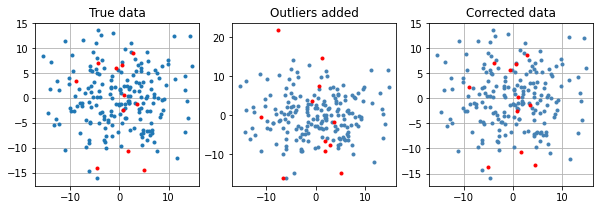

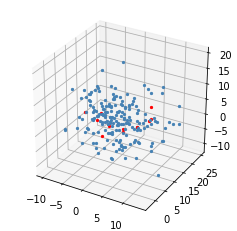

In [7]:

###Points graphe
inlist=dico_outlier
notinlist=[i for i in range(200) if i not in inlist]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))
#fig.suptitle('Horizontally stacked subplots')
#
va, ve, Xe = cMDS(D_TRUE)
ax1.plot(Xe[notinlist,0],Xe[notinlist,1],'.')
ax1.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
# ax1.plot(Xe[:,0],Xe[:,1],'.')
ax1.set_title("True data")
ax1.grid()
#
va, ve, Xe = cMDS(DSO)
ax2.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax2.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
# ax2.plot(Xe[:,0],Xe[:,1],'.',color='orange')
ax2.set_title("Outliers added")
#
va, ve, Xe = cMDS(cdata_proj)   #cdata_proj)

#Xe=pd.DataFrame(np.asarray([Xe[:,1],Xe[:,2]]).T, columns = ['principal component 1', 'principal component 2'])
ax3.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax3.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
# ax3.plot(Xe[:,0],Xe[:,2],'.',color='green')
ax3.set_title("Corrected data")
#ax3.legend(targets)
ax3.grid()
plt.show()

###Représentation 3D
tab = data
coord=np.array(tab)
ttab=np.array(coord)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='3d')
# for e in ttab:
#
#     ax.scatter(e[0],e[1],e[2], s = 5)
#
#
# plt.show()

for i in range(200):
    e=ttab[i]
    if (i in inlist):
        ax.scatter(e[0],e[1],0, s = 5,color='red')
        ax.scatter(e[0],e[1],e[2], s = 5,color=[1,1,1,0])
    else:
        ax.scatter(e[0],e[1],e[2], s = 5,color
        ='steelblue')


plt.show()

In [8]:

# ###Correction
#
# a,b=CorrectProjection(200,coord,[ 34,  99, 121, 178],4)
# c=b[66].reshape((20,2))
# d=coord[66].reshape((20,2))
# plt.figure()
# plt.plot(c[:,0],c[:,1],label="corrected")
# plt.plot(d[:,0],d[:,1],label="true cell")
# plt.plot()
# plt.legend()
# # for e in c:
# #     plt.scatter(e[0],e[1],s=5)
#
# plt.show()


# ###PCvPC (does not work)
# ttab=np.array(coord_corr)

# fig, axs = plt.subplots(3, 3)
# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('PC1vPC2')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('PC1vPC3')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('PC2vPC3')
# axs[0, 2].plot(x, -y, 'tab:red')
# axs[0, 2].set_title('PC1vPC4')
# axs[1, 2].plot(x, -y, 'tab:red')
# axs[1, 2].set_title('PC2vPC4')
# axs[2, 2].plot(x, -y, 'tab:red')
# axs[2, 2].set_title('PC3vPC4')
# plt.show()


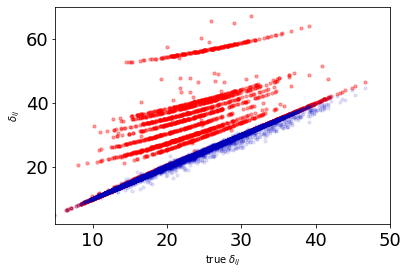

0.11286340828868396


In [9]:
###Shepard Diagram

DSO_flat=DSO.flatten()
D_TRUE_flat=D_TRUE.flatten()
cdata_proj_flat=cdata_proj.flatten()

plt.figure()
SMALL_SIZE=18
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.scatter(D_TRUE_flat,DSO_flat,color='red',alpha=0.2,s=10)
plt.scatter(D_TRUE_flat,cdata_proj_flat,color='mediumblue',alpha=0.05,s=10)

plt.xlabel(r"true $\delta_{ij}$")
plt.ylabel(r'$\delta_{ij}$')
axes = plt.gca()
axes.set_xlim(5,50)
axes.set_ylim(2,70)

plt.show()

diff=np.abs(cdata_proj_flat-D_TRUE_flat)
print(np.mean(diff))

20
[[-1.07685579e-01  8.25241730e-02 -2.69240720e-01  9.15874465e-02
   8.52672967e-01 -2.21974378e-01 -1.08333870e-01 -8.59650685e-02
  -3.11381371e-01 -2.28577587e-02 -5.73913910e-02  2.38800642e-04
   6.69768579e-02  1.08796581e-04  8.00281154e-04  1.86865380e-03
  -8.13548023e-05  1.35724106e-05 -4.23913837e-05 -3.86804067e-05]
 [ 1.27016161e-02  7.49240827e-02  2.71137273e-01 -1.94038816e-01
  -1.97191283e-02 -6.84781487e-01  5.43864544e-01  2.02083706e-01
  -6.37049414e-02  8.51927956e-02 -2.45198816e-01  6.25997055e-05
  -7.27483992e-02  2.30651245e-04  5.74586560e-03 -1.88016229e-02
   1.86884938e-07 -1.17313054e-04  1.67729589e-04 -1.90756906e-04]
 [ 3.03952436e-01  7.20073817e-02 -2.73835635e-01 -5.87903959e-02
   3.18881323e-01  2.24417159e-01  2.64753521e-01  4.61306171e-01
   6.18303971e-01  3.68618472e-02 -3.30541602e-02  1.46669636e-04
  -5.73438829e-02 -2.07538822e-04  3.08444175e-02 -6.96089254e-03
   7.80196142e-05 -1.61569719e-05  7.51933786e-05  1.23348291e-04]
 [ 3

ValueError: x and y must have same first dimension, but have shapes (13,) and (20,)

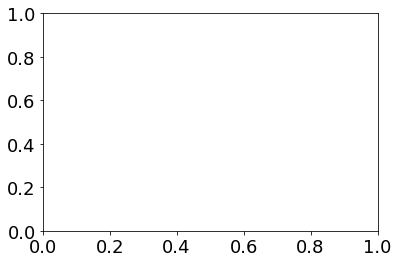

In [10]:
### PCA

pca_method = PCA()
principalComponents_test1 = pca_method.fit_transform(tab)
#Df_pc_test1=pd.DataFrame(data = principalComponents_test1, columns = ['principal component 1', 'principal component 2'])

print(len(pca_method.components_))
print(pca_method.components_)
print(pca_method.explained_variance_ratio_)
print(pca_method.explained_variance_)

plt.figure()
plt.plot(range(0,13),np.cumsum(pca_method.explained_variance_ratio_),label="% variance explained cumulative")
plt.plot(range(0,13),pca_method.explained_variance_ratio_,label="% variance explained")
plt.legend()
plt.show()

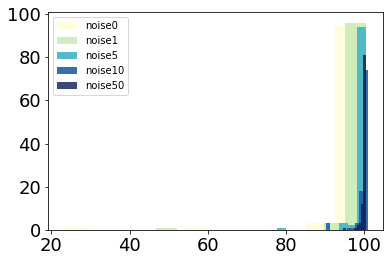

99.94455230728073 79.10007184578433
99.98845512224455 28.999638221612763
99.94122742263659 5.790144474803811
99.96673051554149 2.921233009007775
99.9515279685166 0.41843034923674693


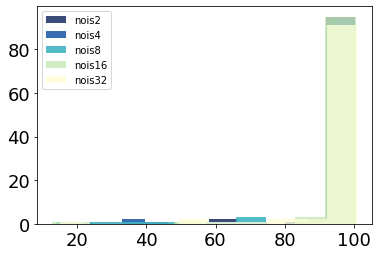

99.62487299334254 140.57278505678033
99.85175250973299 101.38529980950872
99.89073593424564 219.58319764885115
99.95024962033895 115.9098384654537
99.9804073029758 105.5068969297298


In [11]:
### Test influence bruit 0

data_n = pd.read_csv(r'outputs/noise0.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll0=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/noise1.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll1=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/noise5.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll5=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/noise10.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll10=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/noise50.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll50=DrawNSimplices(DSO,N,B,0,4)

blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
plt.hist(hcoll0,label='noise0',color=blues[0])
plt.hist(hcoll1,label='noise1',color=blues[1])
plt.hist(hcoll5,label='noise5',color=blues[2])
plt.hist(hcoll10,label='noise10',color=blues[3])
plt.hist(hcoll50,label='noise50',color=blues[4])
plt.legend()
plt.show()

print(np.median(hcoll0),np.var(hcoll0))
print(np.median(hcoll1),np.var(hcoll1))
print(np.median(hcoll5),np.var(hcoll5))
print(np.median(hcoll10),np.var(hcoll10))
print(np.median(hcoll50),np.var(hcoll50))

### Test influence bruit 2

data_n = pd.read_csv(r'outputs/nois2.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll0=DrawNSimplices(DSO,N,B,0,2)

data_n = pd.read_csv(r'outputs/nois4.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll1=DrawNSimplices(DSO,N,B,0,4)

data_n = pd.read_csv(r'outputs/nois8.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll5=DrawNSimplices(DSO,N,B,0,8)

data_n = pd.read_csv(r'outputs/nois16.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll10=DrawNSimplices(DSO,N,B,0,16)

data_n = pd.read_csv(r'outputs/nois32.csv',sep=';',header=None)
D=pdist(data_n.copy())
D_TRUE=squareform(D)

data_n.loc[0,0] = 100
data_n.head()

N=200
B=100
D=pdist(data_n)
DSO=squareform(D)

B,hcoll50=DrawNSimplices(DSO,N,B,0,32)

blues=np.array([[255,255,217,256*0.8],[199,233,180,256*0.8], [65,182,196,256*0.9], [34,94,168,256*0.9], [8,29,88,256*0.8]])/256

plt.figure()
plt.hist(hcoll0,label='nois2',color=blues[4])
plt.hist(hcoll1,label='nois4',color=blues[3])
plt.hist(hcoll5,label='nois8',color=blues[2])
plt.hist(hcoll10,label='nois16',color=blues[1])
plt.hist(hcoll50,label='nois32',color=blues[0])
plt.legend()
plt.show()

print(np.median(hcoll50),np.var(hcoll50))
print(np.median(hcoll10),np.var(hcoll10))
print(np.median(hcoll5),np.var(hcoll5))
print(np.median(hcoll1),np.var(hcoll1))
print(np.median(hcoll0),np.var(hcoll0))

/Users/wanxinli/Library/Python/3.8/lib/python/site-packages/sklearn/manifold/_mds.py:441: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


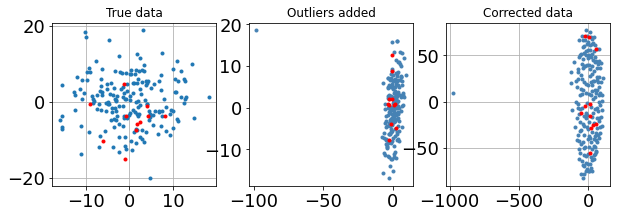

In [12]:
### Test passage distance à coordonnées

clf = manifold.MDS(n_components=2, max_iter=1000)
cdata2_coord = clf.fit_transform(DSO)

D2=pdist(cdata2_coord)
DSO2=squareform(D2)


inlist=dico_outlier
notinlist=[i for i in range(200) if i not in inlist]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,3))
#fig.suptitle('Horizontally stacked subplots')
#
va, ve, Xe = cMDS(D_TRUE)
ax1.plot(Xe[notinlist,0],Xe[notinlist,1],'.')
ax1.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
# ax1.plot(Xe[:,0],Xe[:,1],'.')
ax1.set_title("True data")
ax1.grid()
#
va, ve, Xe = cMDS(DSO)
ax2.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax2.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
# ax2.plot(Xe[:,0],Xe[:,1],'.',color='orange')
ax2.set_title("Outliers added")
#
va, ve, Xe = cMDS(DSO2)   #cdata_proj)

#Xe=pd.DataFrame(np.asarray([Xe[:,1],Xe[:,2]]).T, columns = ['principal component 1', 'principal component 2'])
ax3.plot(Xe[notinlist,0],Xe[notinlist,1],'.', color='steelblue')
ax3.plot(Xe[inlist,0],Xe[inlist,1],'.',color='red')
# ax3.plot(Xe[:,0],Xe[:,2],'.',color='green')
ax3.set_title("Corrected data")
#ax3.legend(targets)
ax3.grid()
plt.show()


In [13]:
# ##Test évolution des distances avant/après MDS

# #DSO corrigées
# #

# dico_h
# Dis=pdist(dico_h)
# DSO_MDS=squareform(Dis)


# DSO_flat=DSO.flatten()
# DSO_MDS_flat=DSO_MDS.flatten()

# plt.figure()
# SMALL_SIZE=18
# plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
# plt.scatter(DSO_flat,DSO_MDS_flat,alpha=0.2,s=10)

# plt.xlabel(r"true $\delta_{ij}$")
# plt.ylabel(r'$\delta_{ij}$')

# plt.show()



NameError: name 'dico_h' is not defined